In [1]:
import numpy as np
from src.latticegas import LatticeGas as latgas

In [2]:
variant = 7
N = 16 

In [3]:
n_x = 420
n_y = 180

n_step = 10_000
step_frame = 100

xc = int(n_x/4)
yc = int(n_y/2)
r = int(n_y/9)

u_lb_min = 0.01
u_lb_max = 0.1
Re_min = 20
Re_max = 1000

xc, yc, r

(105, 90, 20)

In [4]:
u_lb = u_lb_min + (variant - 1)*(u_lb_max - u_lb_min)/(N-1)
Re = int(Re_min + (variant - 1)*(Re_max - Re_min)/(N-1))
Re = 180
u_lb, Re

(0.046000000000000006, 180)

In [5]:
parametrs = {'nx':n_x, 'ny':n_y, 'u_lb':u_lb, 'Re':Re}
obstacle = {'xc':xc, 'yc':yc, 'r':r}

## CPU calculate

In [6]:
model = latgas(parametrs, obstacle)

In [ ]:
%%time
model.solve(n_step, step_frame)

Process: 0 %,  time: 0.00 s
Process: 10 %,  time: 48.00 s
Process: 20 %,  time: 93.30 s


In [8]:
density = np.array(model.field_den)
velosity = np.array(model.field_u)
pressure = np.array(model.field_p)
u_x = np.array(model.field_ux)
u_y = np.array(model.field_uy)

In [25]:
np.save('data/density', density)
np.save('data/velosity', velosity)
np.save('data/pressure', pressure)
np.save('data/ux', u_x)
np.save('data/uy', u_y)

### Vizualization

In [10]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [27]:
den = np.load('data/density.npy')
vel = np.load('data/velosity.npy')
pres = np.load('data/pressure.npy')
ux = np.load('data/ux.npy')
uy = np.load('data/uy.npy')

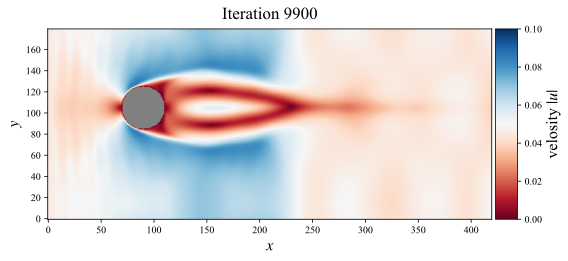

In [13]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

i = 99

obst = model.obstacle.T

velos = velosity[i].T #vel[i].T
velos[obst] = np.nan

fig, ax = plt.subplots(figsize=(8, 5), nrows=1, ncols=1, tight_layout=True, dpi=300);
divider = make_axes_locatable(ax)

im = ax.imshow(velos, cmap="RdBu", vmin=0, vmax=0.1) # "jet"
ax.invert_yaxis()
cax = divider.append_axes('right', size='5%', pad=0.05)

cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(r"velosity $|u|$", fontsize=fs)

ax.set_facecolor("grey")

ax.set_title(f'Iteration {i*step_frame}', fontsize=fs+1, pad=10)
ax.set_xlabel(r'$x$',  fontsize = fs)
ax.set_ylabel(r'$y$',  fontsize = fs)
        
plt.show()

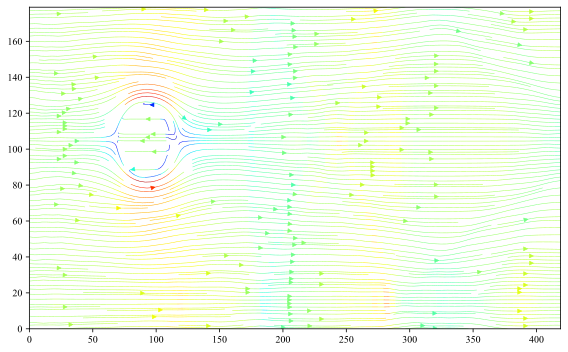

In [157]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

i = 60

fig, ax = plt.subplots(figsize=(8, 5), nrows=1, ncols=1, tight_layout=True, dpi=300);

x, y = np.meshgrid(np.arange(n_x), np.arange(n_y))

ax.streamplot(x, y, ux[i].T, uy[i].T, density=3, linewidth=0.5, arrowsize=1, cmap="jet", color=vel[i].T)

plt.show()

## Gif

In [29]:
import matplotlib.animation as animation
from matplotlib import ticker

MovieWriter ffmpeg unavailable; using Pillow instead.


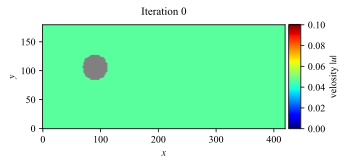

In [33]:
fig, ax = plt.subplots(figsize=(5,2.5))



fs = 10

divider = make_axes_locatable(ax)
ax.tick_params(left=True, labelleft=True, bottom=True, labelbottom=True, labelsize=fs)
cax = divider.append_axes('right', size='5%', pad=0.05)


obst = model.obstacle.T


def animate(i):
    ax.clear()
    velosity = vel[i].T
    velosity[obst] = np.nan
    im = ax.imshow(velosity, cmap="jet", vmin=0, vmax=0.1)
    ax.invert_yaxis()
    cb = fig.colorbar(im, cax=cax, orientation='vertical')
    cb.set_label(r"velosity $|u|$", fontsize=fs)
    ax.set_facecolor("grey")
    ax.set_title(f'Iteration {i*step_frame}', fontsize=fs+1, pad=10)
    ax.set_xlabel(r'$x$',  fontsize = fs)
    ax.set_ylabel(r'$y$',  fontsize = fs)
    plt.tight_layout()
    return im

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 400, 1),
                                      interval = 100,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/u_flow_all.gif',
                writer='ffmpeg',  
                  dpi=300)